In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Виконаємо завантаження та підготовку даних

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
train_images = np.repeat(train_images[..., np.newaxis], 3, -1)
train_images = tf.image.resize(train_images, (32, 32)) / 255.0
test_images = np.repeat(test_images[..., np.newaxis], 3, -1)
test_images = tf.image.resize(test_images, (32, 32)) / 255.0

train_labels = train_labels.astype('int64')
test_labels = test_labels.astype('int64')

Створюємо об'єкт ImageDataGenerator. Завдяки йому моделі краще узагальнити та підвищити її стійкість до перенавчання.
Це робиться за рахунок певних особливостей, таких як : Збільшення набору даних, Зменшення перенавчання, Збільшення різноманітності даних. Відповідно, це використовується як інструмент для покращення результатів моделі і підвищення її ефективонсті.

In [4]:
data_generator = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, zoom_range=0.1)

Проведемо створення моделі та проведемо її компіляцію:

In [5]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
vgg_base.trainable = False

model = Sequential([
    vgg_base,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Прооведемо навчання нашої моделі: 

In [6]:
history = model.fit(data_generator.flow(train_images, train_labels, batch_size=64), epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10


c:\Users\ricky\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 396s 419ms/step - accuracy: 0.6461 - loss: 0.9747 - val_accuracy: 0.8030 - val_loss: 0.5302
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 380s 405ms/step - accuracy: 0.7801 - loss: 0.5978 - val_accuracy: 0.8212 - val_loss: 0.4844
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 389s 414ms/step - accuracy: 0.7955 - loss: 0.5586 - val_accuracy: 0.8286 - val_loss: 0.4713
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 373s 397ms/step - accuracy: 0.8041 - loss: 0.5348 - val_accuracy: 0.8341 - val_loss: 0.4509
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 378s 403ms/step - accuracy: 0.8081 - loss: 0.5235 - val_accuracy: 0.8279 - val_loss: 0.4698
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 381s 405ms/step - accuracy: 0.8105 - loss: 0.5121 - val_accuracy: 0.8349 - val_loss: 0.4462
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 379s 404ms/step - accuracy: 0.8177 - loss: 0.5053 - val_accuracy: 0.8390 - val_loss: 0.4423
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 379s 404ms/step - accuracy: 0.8177 - loss: 0.49

У цьому фрагменті. Методи донавчання та визначення ознак застосовуються до зображень під час навчання за допомогою об'єкта data_generator, який передається в якості вхідних даних для методу fit().

Виведемо метрики для оцінки точності та втрат на тестових даних

In [7]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 55s 176ms/step - accuracy: 0.8390 - loss: 0.4276
Test Loss: 0.4393, Test Accuracy: 0.8361


Виведемо графіки ефективності навчання нейронної мережі з відображеннями збільшення точності під час навчання та зменшення похибки на тестових даних

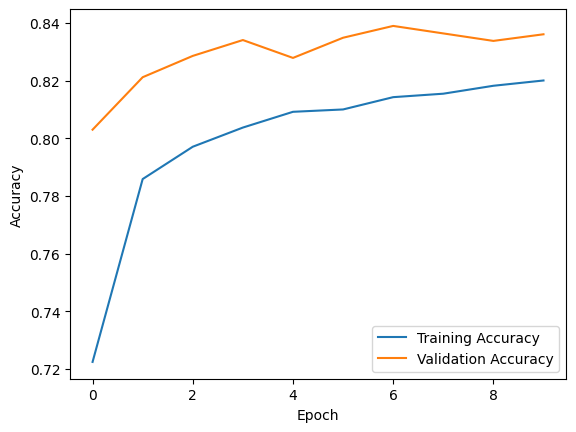

In [8]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

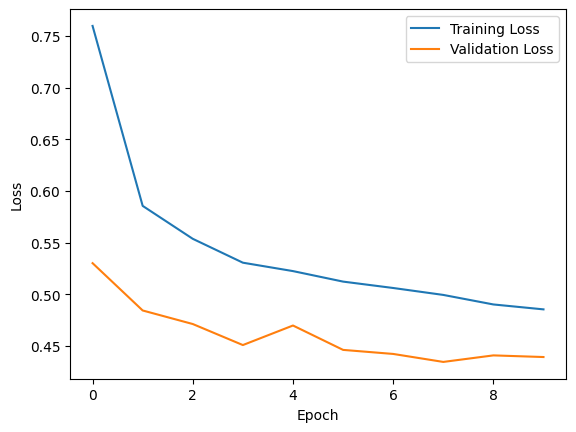

In [9]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Висновок:**

В даній частині завдання ми створили нейронну мережу на архітетурі VGG16 (Visual Geometry Group 16). Мережа має 16 згорткових та повнозв'язаних шарів, що робить її досить глибокою для часу її створення. 

Дана модель на момент її випуску була дуже інноваційною і призвела до хороших результатів на задачах класифікації зображень.
VGG - це класика. У неї відносно стара архітектура, але вона досі використовується.
Головна особливість VGG16 - задіяння невеликих фільтрів із розміром ядра 3x3 пікселі та застосування глибоких згорткових шарів. Часто модель потребує оптимізації та регуляризації, що пояснюється особливостями архітектури та високою обчислювальною складністю.


Є, звісно, ефективніші альтернативи, але новачкам знати принципи її роботи дуже корисно. Вона досить довга в навчанні (що склалао у нас 64 хв) і досягли точності 84%, тим не менш це база з якою варто ознайомитись для розуміння архітектури та вкладеності шарів.


